In [11]:
# STEP 1
# import libraries
import fitz
import io
from PIL import Image
import os

#Define path for saved images
images_path = 'images/'
  
# STEP 2
# file path you want to extract images from
file = "1_pic.pdf"
  
# open the file
pdf_file = fitz.open(file)
  
# STEP 3
# iterate over PDF pages
for page_index in range(len(pdf_file)):
  
    # get the page itself
    page = pdf_file[page_index]
    image_list = page.get_images()

    #Save all the extracted images
    for i, image in enumerate(image_list, start=1):
        #Extract the image object number
        xref = image[0]
        #Extract image
        base_image = pdf_file.extract_image(xref)
        #Store image bytes
        image_bytes = base_image['image']
        #Store image extension
        image_ext = base_image['ext']
        #Generate image file name
        image_name = str(i) + '.' + image_ext
        #Save image
        with open(os.path.join(images_path, image_name) , 'wb') as image_file:
            image_file.write(image_bytes)
            image_file.close()
  
    # printing number of images found in this page
    if image_list:
        print(
            f"[+] Found a total of {len(image_list)} images in page {page_index}")
    else:
        print("[!] No images found on page", page_index)
    for image_index, img in enumerate(page.get_images(), start=1):
  
        # get the XREF of the image
        xref = img[0]
  
        # extract the image bytes
        base_image = pdf_file.extract_image(xref)
        image_bytes = base_image["image"]
  
        # get the image extension
        image_ext = base_image["ext"]

[+] Found a total of 1 images in page 0


In [2]:
# Extract image from paper

#Import required dependencies
import fitz
import os
from PIL import Image

#Define path to PDF file
file_path = 'Auxiliary Tasks in Multi-task Learning.pdf'

#Define path for saved images
images_path = 'images/'

#Open PDF file
pdf_file = fitz.open(file_path)

#Get the number of pages in PDF file
page_nums = len(pdf_file)

#Create empty list to store images information
images_list = []

#Extract all images information from each page
for page_num in range(page_nums):
    page_content = pdf_file[page_num]
    images_list.extend(page_content.get_images())

#Raise error if PDF has no images
if len(images_list)==0:
    raise ValueError(f'No images found in {file_path}')

#Save all the extracted images
for i, img in enumerate(images_list, start=1):
    #Extract the image object number
    xref = img[0]
    #Extract image
    base_image = pdf_file.extract_image(xref)
    #Store image bytes
    image_bytes = base_image['image']
    #Store image extension
    image_ext = base_image['ext']
    #Generate image file name
    image_name = str(i) + '.' + image_ext
    #Save image
    with open(os.path.join(images_path, image_name) , 'wb') as image_file:
        image_file.write(image_bytes)
        image_file.close()


In [ ]:
# convert pdf to jpg

# import module
from pdf2image import convert_from_path

# Store Pdf with convert_from_path function
images = convert_from_path('DD school list-202324.pdf', poppler_path = r'Release-23.07.0-0\poppler-23.07.0\Library\bin')
 
for i in range(len(images)):
      # Save pages as images in the pdf
    images[i].save('page'+ str(i) +'.jpg', 'JPEG')

: 

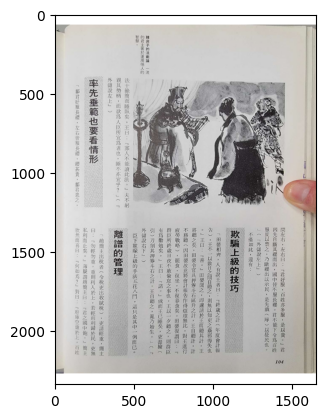

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import os

plt.imshow(images[0])                                    # 在圖表中繪製圖片
plt.show()  

In [31]:
def save_image(save_path: str, image_name: str):
    # 構造完整的儲存路徑 
    save_file = os.path.join(save_path, image_name)
    # 寫入圖片
    images[0].save(save_file)

(-0.5, 1652.5, 2338.5, -0.5)

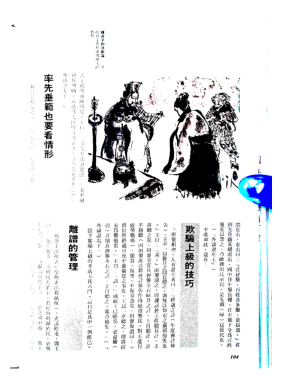

In [24]:
import cv2

image_path = "images/1.jpg"

image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# convert BGR to GRAY
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, output1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)     # 如果大於 127 就等於 255，反之等於 0。

output1
plt.imshow(output1) 
plt.axis('off')

In [25]:
import cv2

image_path = "images/image_binary.jpg"

image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# convert BGR to GRAY
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, gray = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)     # 如果大於 127 就等於 255，反之等於 0。


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)

contours = cv2.findContours(gradient, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

image_info = []

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255))
    coord = [x, y, w, h] 
    image_info.append(coord)
    

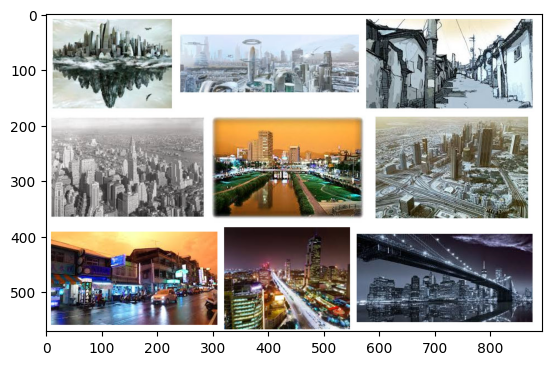

In [64]:
image_path = "images/yEpQF.jpg"

image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
plt.imshow(image)                                    # 在圖表中繪製圖片

In [3]:
image_info

[[274, 394, 37, 14],
 [195, 394, 37, 14],
 [120, 394, 28, 14],
 [49, 394, 12, 14],
 [9, 325, 38, 14],
 [10, 246, 37, 14],
 [10, 167, 37, 14],
 [18, 88, 28, 14],
 [48, 12, 272, 380],
 [35, 9, 12, 14]]

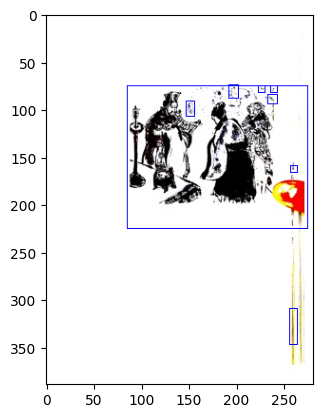

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
plt.imshow(image)                                    # 在圖表中繪製圖片

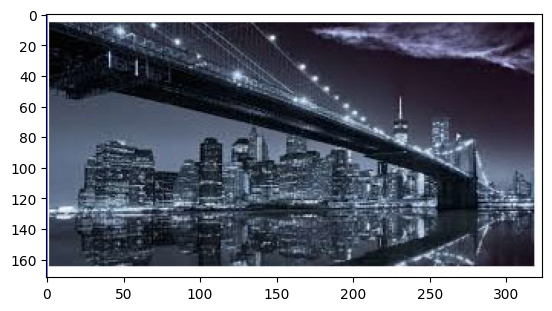

In [52]:
# Cropping an image
cropped_image = image[390:390+172, 558:558+324]   # y, x
plt.imshow(cropped_image)    

---